<a href="https://colab.research.google.com/github/jtao22/PythonML/blob/main/imageclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Image classification using convolutional neural network
#Import
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential as seq
from keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.layers import MaxPooling2D as mp2d 
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pyplot
pyplot.style.use('fivethirtyeight')

In [22]:
#Upload data
from keras.datasets import cifar10
(trainX,trainY), (testX,testY) = cifar10.load_data()


In [23]:
#get image classification
classification = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']

In [24]:
#convert labels into set of number to put into neural network
trainY1h = to_categorical(trainY)
testY1h = to_categorical(testY)

In [25]:
#normalize index values to be 0-1
trainX = trainX/255
testX = testX/255

In [28]:
#create architecture
arch = seq()
#create NN
arch.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3))) #first convolution layer
arch.add(mp2d(pool_size=(2,2))) # first pooling layer
arch.add(Conv2D(32, (5,5), activation='relu')) #second convolution layer
arch.add(mp2d(pool_size=(2,2))) # second pooling layer
arch.add(Flatten()) #flattening layer
arch.add(Dense(1024, activation='relu')) #1024 neuron layer
arch.add(Dropout(0.5)) #first dropout layer
arch.add(Dense(512, activation='relu')) #512 neuron layer
arch.add(Dropout(0.5)) #second dropout layer
arch.add(Dense(256, activation='relu')) #256 neuron layer
arch.add(Dense(10, activation='softmax')) #10 neuron layer
#compile
arch.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
#train
hist = arch.fit(trainX,trainY1h, batch_size=256, epochs=12, validation_split = 0.15)

Epoch 1/12
167/167 [==============================] - 54s 319ms/step - loss: 2.0060 - accuracy: 0.2433 - val_loss: 2.3280 - val_accuracy: 0.2700
Epoch 2/12
167/167 [==============================] - 52s 314ms/step - loss: 1.5966 - accuracy: 0.4228 - val_loss: 1.4389 - val_accuracy: 0.4721
Epoch 3/12
167/167 [==============================] - 53s 316ms/step - loss: 1.3548 - accuracy: 0.5130 - val_loss: 1.3750 - val_accuracy: 0.5011
Epoch 4/12
167/167 [==============================] - 52s 314ms/step - loss: 1.3102 - accuracy: 0.5335 - val_loss: 1.1950 - val_accuracy: 0.5745
Epoch 5/12
167/167 [==============================] - 52s 313ms/step - loss: 1.1664 - accuracy: 0.5873 - val_loss: 1.5354 - val_accuracy: 0.4877
Epoch 6/12
167/167 [==============================] - 52s 312ms/step - loss: 1.2324 - accuracy: 0.5642 - val_loss: 1.0862 - val_accuracy: 0.6153
Epoch 7/12
167/167 [==============================] - 52s 313ms/step - loss: 1.0537 - accuracy: 0.6262 - val_loss: 1.0429 - val_ac

313/313 [==============================] - 4s 14ms/step - loss: 0.9992 - accuracy: 0.6644


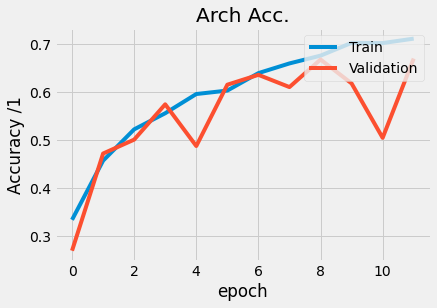

In [33]:
#check test data
arch.evaluate(testX,testY1h)[1]
#plot
pyplot.plot(hist.history['accuracy'])
pyplot.plot(hist.history['val_accuracy'])
pyplot.title('Arch Acc.')
pyplot.xlabel('epoch')
pyplot.ylabel('Accuracy /1')
pyplot.legend(['Train', 'Validation'], loc = 'upper right')
pyplot.show()

In [53]:
#code to test 
from google.colab import files
uploaded = files.upload()


Saving testing.jpeg to testing.jpeg


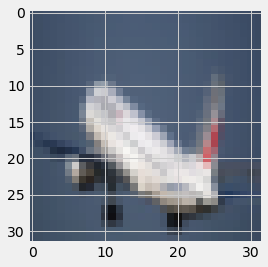

In [54]:
#structure input
image = pyplot.imread('testing.jpeg')
from skimage.transform import resize
resized = resize(image,(32,32,3))
img = pyplot.imshow(resized)

In [55]:
#predict, order by likelihood
predictions = arch.predict(np.array([resized]))
output = [0,1,2,3,4,5,6,7,8,9]
var = predictions
for i in range(10):
  for j in range(10):
    if (var[0][output[i]] > var[0][output[j]]):
      temp = var[0][output[i]]
      var[0][output[i]] = var[0][output[j]]
      var[0][output[j]] = temp
#print
for i in range(5):
  print(classification[output[i]])

airplane
car
bird
cat
deer
